In [278]:
## Import library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error

In [279]:
url = r'https://raw.githubusercontent.com/natthawit-jan/car_price_prediction_proj/master/Car_Purchasing_Data.csv'
df = pd.read_csv(url)

In [280]:
df.head()

,Customer Name,Customer e-mail,Country,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248


In [281]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Customer Name        500 non-null    object 
 1   Customer e-mail      500 non-null    object 
 2   Country              500 non-null    object 
 3   Gender               500 non-null    int64  
 4   Age                  500 non-null    int64  
 5   Annual Salary        500 non-null    float64
 6   Credit Card Debt     500 non-null    float64
 7   Net Worth            500 non-null    float64
 8   Car Purchase Amount  500 non-null    float64
dtypes: float64(4), int64(2), object(3)
memory usage: 35.3+ KB


In [282]:
df.describe()

,Gender,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount
count,500.000000,500.000000,500.000000,500.000000,500.000000,500.000000
mean,0.506000,46.224000,62127.239608,9607.645049,431475.713625,44209.799218
std,0.500465,7.990339,11703.378228,3489.187973,173536.756340,10773.178744
min,0.000000,20.000000,20000.000000,100.000000,20000.000000,9000.000000
25%,0.000000,41.000000,54391.977195,7397.515792,299824.195900,37629.896040
50%,1.000000,46.000000,62915.497035,9655.035568,426750.120650,43997.783390
75%,1.000000,52.000000,70117.862005,11798.867487,557324.478725,51254.709517
max,1.000000,70.000000,100000.000000,20000.000000,1000000.000000,80000.000000


Rename the column of gender to is_male, where 1 indicates male and female otherwise

In [283]:
df['Customer Name Length'] = df['Customer Name'].apply(lambda d: len(d.replace(' ', '')))
df.rename(columns={'Gender': 'Is_Male'}, inplace=True)

In [284]:
df.head()

,Customer Name,Customer e-mail,Country,Is_Male,Age,Annual Salary,Credit Card Debt,Net Worth,Car Purchase Amount,Customer Name Length
0,Martina Avila,cubilia.Curae.Phasellus@quisaccumsanconvallis.edu,USA,0,42,62812.09301,11609.380910,238961.2505,35321.45877,12
1,Harlan Barnes,eu.dolor@diam.co.uk,USA,0,41,66646.89292,9572.957136,530973.9078,45115.52566,12
2,Naomi Rodriquez,vulputate.mauris.sagittis@ametconsectetueradip...,USA,1,43,53798.55112,11160.355060,638467.1773,42925.70921,14
3,Jade Cunningham,malesuada@dignissim.com,USA,1,58,79370.03798,14426.164850,548599.0524,67422.36313,14
4,Cedric Leach,felis.ullamcorper.viverra@egetmollislectus.net,USA,1,57,59729.15130,5358.712177,560304.0671,55915.46248,11


<AxesSubplot:xlabel='Customer Name Length', ylabel='Car Purchase Amount'>

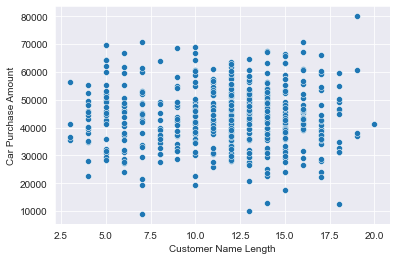

In [285]:
sns.scatterplot(data=df, x="Customer Name Length", y="Car Purchase Amount")

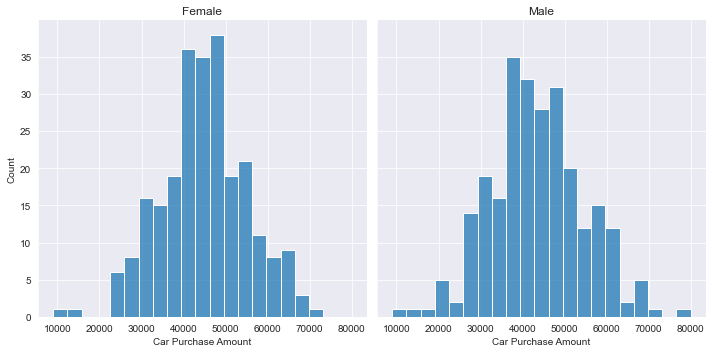

In [286]:
d = sns.displot(data=df, x="Car Purchase Amount", col="Is_Male",)
d.axes[0][0].set_title('Female')
d.axes[0][1].set_title('Male')
plt.show()

In [287]:
cols = [name for name in df.select_dtypes('number').columns if name != 'Car Purchase Amount']
P = df.corr().drop(columns=cols, index='Car Purchase Amount').T

/var/folders/p8/ysh15_5n5w78sss0_9ywmvyw0000gn/T/ipykernel_2147/2546831319.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  P = df.corr().drop(columns=cols, index='Car Purchase Amount').T


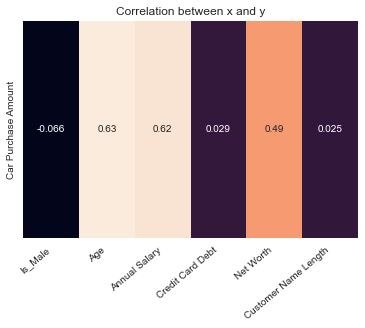

In [288]:
ax = sns.heatmap(P, annot=True, cbar=False)
ax.set_title('Correlation between x and y')
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha='right')
plt.show()

 Correlation between all dataset to see if X are related to each other (Multicorrlinearlity)

/var/folders/p8/ysh15_5n5w78sss0_9ywmvyw0000gn/T/ipykernel_2147/1950817817.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot=True, cbar=False, )


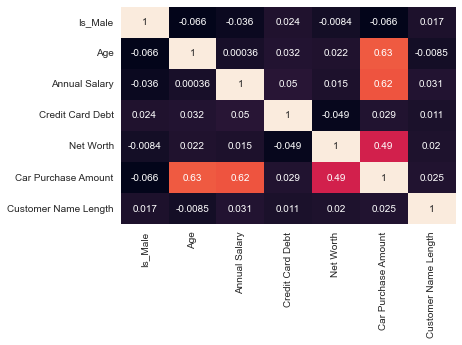

In [289]:
sns.heatmap(df.corr(), annot=True, cbar=False, )
plt.show()

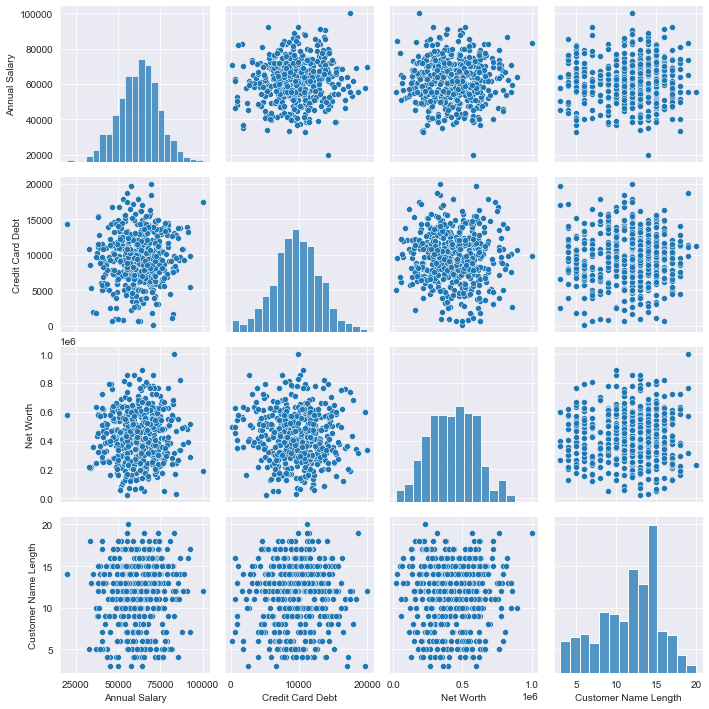

In [290]:
sns.pairplot(data=df.drop(columns=['Age', 'Is_Male', 'Car Purchase Amount']))

In [291]:
## Drop Country column since only USA is present
if 'Country' in df.columns:
    df.drop(columns='Country', inplace=True)
if 'Customer Name' in df.columns:
    df.drop(columns='Customer Name', inplace=True)

Choose to see the plots for only 3 looking-like linear feature (Age, Net Worth and Annual Salary)

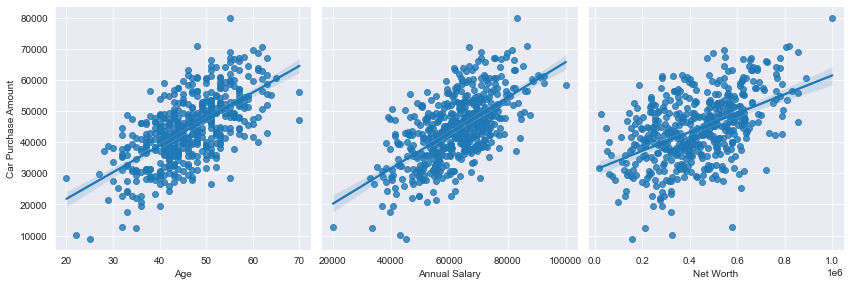

In [292]:
x_elements = ['Age', 'Annual Salary', 'Net Worth']
y_elements = 'Car Purchase Amount'
sns.pairplot(data=df, x_vars=x_elements, y_vars=y_elements, kind="reg", height=4,)

 Therefore, looking from the plots, we can see that there are mainly 3 features that look linear and can be used to train the model. *Age*, *Net Worth* and *Annual Salary*

At first trial, we will include all the features to our model to see if this will give good results

Define X and y for the model

In [293]:
X = df[['Age', 'Annual Salary', 'Net Worth', 'Credit Card Debt', 'Is_Male']]
y = df['Car Purchase Amount']

Divide the data into train and test data. We'll use 70% for the train dataset and 30% for the test dataset.

In [294]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

Create a linear regression model and fit the data with the train dataset

In [295]:
model = LinearRegression()

In [296]:
model.fit(X_train, y_train)

LinearRegression()

See beta 0 (intercept value for the regression equation)

In [297]:
print(f'The intercept (b0) = {model.intercept_}')

The intercept (b0) = -41953.828430624155


See the rest of coefficients (b1, b2, b3)

In [298]:
Y = X_train.columns
for ind, coeff in enumerate(model.coef_):
    print(f'The value of b{ind+1, Y[ind]} = {coeff}')
    ind += 1


The value of b(1, 'Age') = 838.8841810640056
The value of b(2, 'Annual Salary') = 0.5615959316538187
The value of b(3, 'Net Worth') = 0.028888688095426145
The value of b(4, 'Credit Card Debt') = 0.0029281629737240894
The value of b(5, 'Is_Male') = 12.534755554703473


Now, we test our model with the test data

In [299]:
y_pred = model.predict(X_train)

Calculate the mean error for the *train* data

In [300]:
print('MAE:', mean_absolute_error(y_train, y_pred))
print('MSE:', mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_train, y_pred)))

MAE: 198.20984175077936
MSE: 53421.28566625169
RMSE: 231.13045162040353


$ R^2 $ Calculation

In [301]:
R_2_for_test_data = model.score(X_test, y_test)
print(f'R2 score for the test data is {R_2_for_test_data}')

R2 score for the test data is 0.9994215254551113


Calculate the mean error for the *test* data

In [302]:
y_pred = model.predict(X_test)

In [303]:
print('MAE:', mean_absolute_error(y_test, y_pred))
print('MSE:', mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(mean_squared_error(y_test, y_pred)))

MAE: 229.3679551045957
MSE: 68746.23530050738
RMSE: 262.1950329440041


In [304]:
X_With_Constant = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_With_Constant).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       1.000
Model:                             OLS   Adj. R-squared:                  1.000
Method:                  Least Squares   F-statistic:                 1.473e+05
Date:                 Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                         16:01:07   Log-Likelihood:                -2401.7
No. Observations:                  350   AIC:                             4815.
Df Residuals:                      344   BIC:                             4838.
Df Model:                            5                                         
Covariance Type:             nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const            -4.195e+04    109.528   -383.040      0.000   -4.22e+04   -4.17e+04
Age                838.8842      1.569    534.595      0.000     835.798     841.971
Annual Salary        0.5616      0.001    508.429      0.000       0.559       0.564
Net Worth            0.0289   7.15e-05    403.996      0.000       0.029       0.029
Credit Card Debt     0.0029      0.003      0.841      0.401      -0.004       0.010
Is_Male             12.5348     25.061      0.500      0.617     -36.757      61.827
==============================================================================
Omnibus:                      101.856   Durbin-Watson:                   1.874
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               17.862
Skew:                          -0.113   Prob(JB):                     0.000132
Kurtosis:                       1.917   Cond. No.                     4.14e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 4.14e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

From the summary above, we can say that credit card debt and gender features doesn't impact the car price that much, since the graph doesn't look linear and the t scores are close to 0 and p values are greater than the alpha ( 0.05 ). Thus, there are NOT statistically significant for the model.

We create another model where we take out credit debt and gender feature.

In [305]:
X = df[['Age', 'Annual Salary', 'Net Worth']]

In [306]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.3)

In [307]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [308]:
print(f'The intercept (b0) = {model.intercept_}')

The intercept (b0) = -41945.54347196568


In [309]:
Y = X_train.columns
for ind, coeff in enumerate(model.coef_):
    print(f'The value of b{ind+1, Y[ind]} = {coeff}')
    ind += 1

The value of b(1, 'Age') = 838.8721071797767
The value of b(2, 'Annual Salary') = 0.5616792915524746
The value of b(3, 'Net Worth') = 0.02890909514263523


In [310]:
y_pred = model.predict(X_train)

Calculate Mean Error on the *train* data

In [311]:
from sklearn import metrics

print('MAE:', metrics.mean_absolute_error(y_train, y_pred))
print('MSE:', metrics.mean_squared_error(y_train, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_train, y_pred)))

MAE: 209.3738817161614
MSE: 58421.29995956001
RMSE: 241.70498538416624


$ R^2 $ calculation

In [312]:
R_2_for_test_data = model.score(X_test, y_test)
print(f'R2 score for the test data is {R_2_for_test_data}')

R2 score for the test data is 0.9995496428763403


Calculate Mean Error on the *test* data

In [313]:
y_pred = model.predict(X_test)
print('MAE:', metrics.mean_absolute_error(y_test, y_pred))
print('MSE:', metrics.mean_squared_error(y_test, y_pred))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

MAE: 209.86269848609274
MSE: 58609.62054620296
RMSE: 242.09423897772322


In [314]:
X_With_Constant = sm.add_constant(X_train)
sm_model = sm.OLS(y_train, X_With_Constant).fit()
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                             OLS Regression Results                            
===============================================================================
Dep. Variable:     Car Purchase Amount   R-squared:                       0.999
Model:                             OLS   Adj. R-squared:                  0.999
Method:                  Least Squares   F-statistic:                 2.164e+05
Date:                 Sun, 09 Oct 2022   Prob (F-statistic):               0.00
Time:                         16:01:07   Log-Likelihood:                -2417.3
No. Observations:                  350   AIC:                             4843.
Df Residuals:                      346   BIC:                             4858.
Df Model:                            3                                         
Covariance Type:             nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -4.195e+04    109.829   -381.917      0.000   -4.22e+04   -4.17e+04
Age             838.8721      1.670    502.249      0.000     835.587     842.157
Annual Salary     0.5617      0.001    495.797      0.000       0.559       0.564
Net Worth         0.0289   7.65e-05    378.018      0.000       0.029       0.029
==============================================================================
Omnibus:                      175.657   Durbin-Watson:                   2.001
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               20.611
Skew:                          -0.072   Prob(JB):                     3.35e-05
Kurtosis:                       1.820   Cond. No.                     3.98e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.98e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [315]:
!pip list --outdated

Package            Version     Latest    Type
------------------ ----------- --------- -----
asttokens          2.0.5       2.0.8     wheel
attrs              21.4.0      22.1.0    wheel
certifi            2022.6.15.1 2022.9.24 wheel
chardet            3.0.4       5.0.0     wheel
debugpy            1.6.2       1.6.3     wheel
executing          0.8.3       1.1.1     wheel
fastjsonschema     2.16.1      2.16.2    wheel
fonttools          4.34.4      4.37.4    wheel
google-auth        1.4.2       2.12.0    wheel
idna               2.8         3.4       wheel
ipykernel          6.15.1      6.16.0    wheel
ipython            8.4.0       8.5.0     wheel
ipywidgets         7.7.1       8.0.2     wheel
jsonschema         4.7.2       4.16.0    wheel
jupyter-client     7.3.4       7.3.5     wheel
jupyterlab-widgets 1.1.1       3.0.3     wheel
matplotlib         3.5.2       3.6.1     wheel
matplotlib-inline  0.1.3       0.1.6     wheel
mistune            0.8.4       2.0.4     wheel
nbclient      